In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.animation import FuncAnimation, PillowWriter

In [ ]:
# Bubble sorting

l = list(np.random.randint(100, size=25))
print(max(l))

for j in range(1, int(len(l))):
    for i in range(int(len(l)-j)):
        if l[i] > l[i+1]:
            l.insert(i+1, l.pop(i))

print(l)

99


<IPython.core.display.Javascript object>


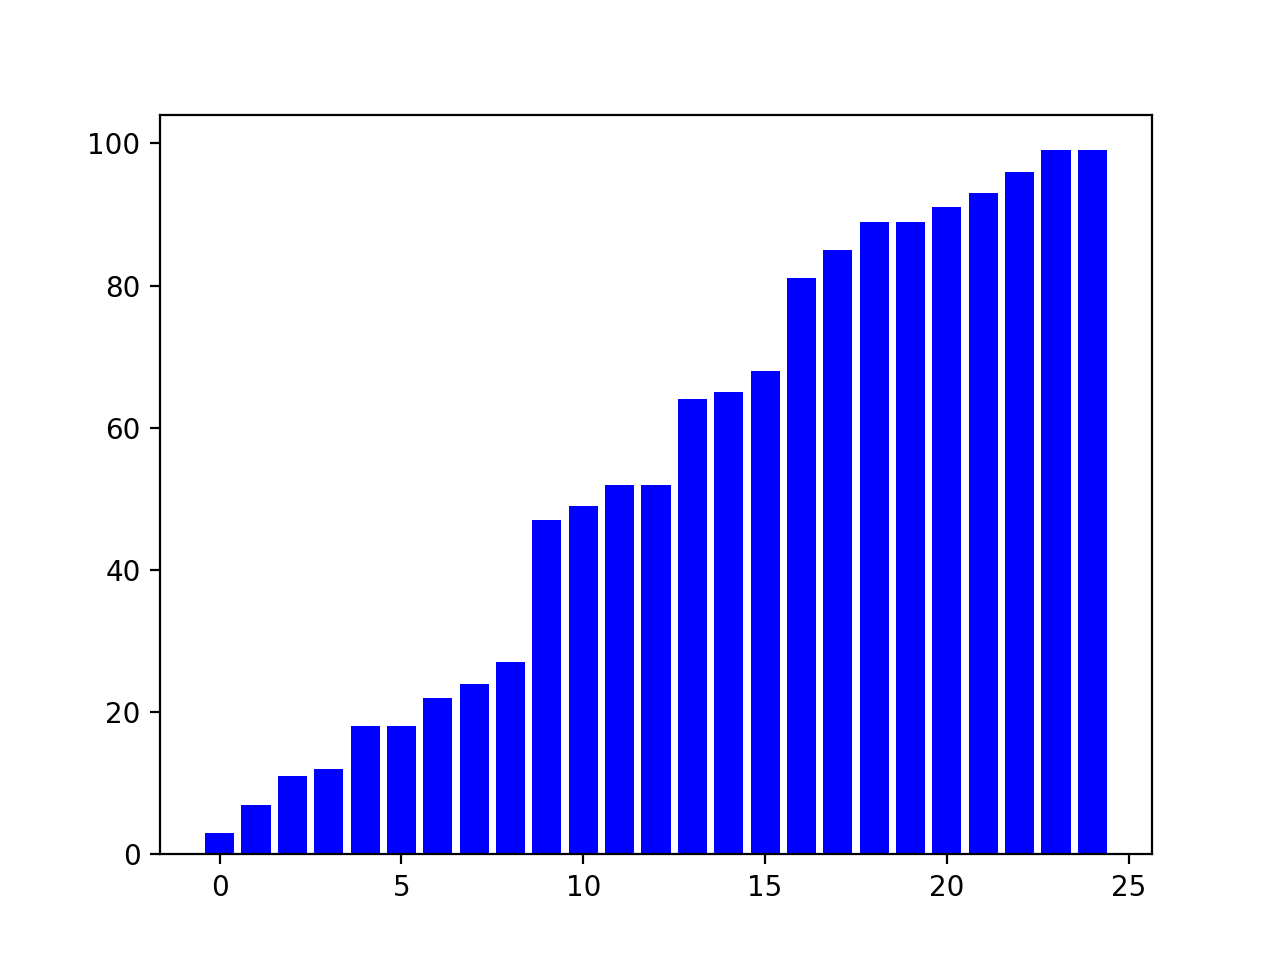

In [ ]:
#Bubble sorting animation simple

l = list(np.random.randint(100, size=25))
print(max(l))

fig, ax = plt.subplots()

x = list(range(len(l)))
barcol = ax.bar(x, l, color='b')

def gen_function() -> list:
    '''indeces for walkthroughs, by one value less for each to follow'''
    ind = []
    for j in range(1, int(len(l))): #walkthrough number
        for i in range(int(len(l)-j)): #walkthrough indeces
            ind.append(i)
    return ind

frames = gen_function()

def update(i) -> 'creates a plot':
    '''walks through indeces, swithes if necessary'''
    if l[i] > l[i+1]:
        l.insert(i+1, l.pop(i))   #switches if next is lower
        barcol[i].set_height(l[i])    #bar hight update
        barcol[i+1].set_height(l[i+1])
    return barcol

animation = FuncAnimation(
    fig,                  # figure where animation is displayed
    func=update,          # frame update function
    frames=frames,        # each frame changing parameter
    fargs=None,           # additional parameters for update function, pay attention to the comma
    interval=30,          # lattency
    blit=True,            # dubble buffering
    repeat=False)         # cycling

#animation.save("animation.gif", dpi=300, writer=PillowWriter(fps=30))

plt.show()



<IPython.core.display.Javascript object>


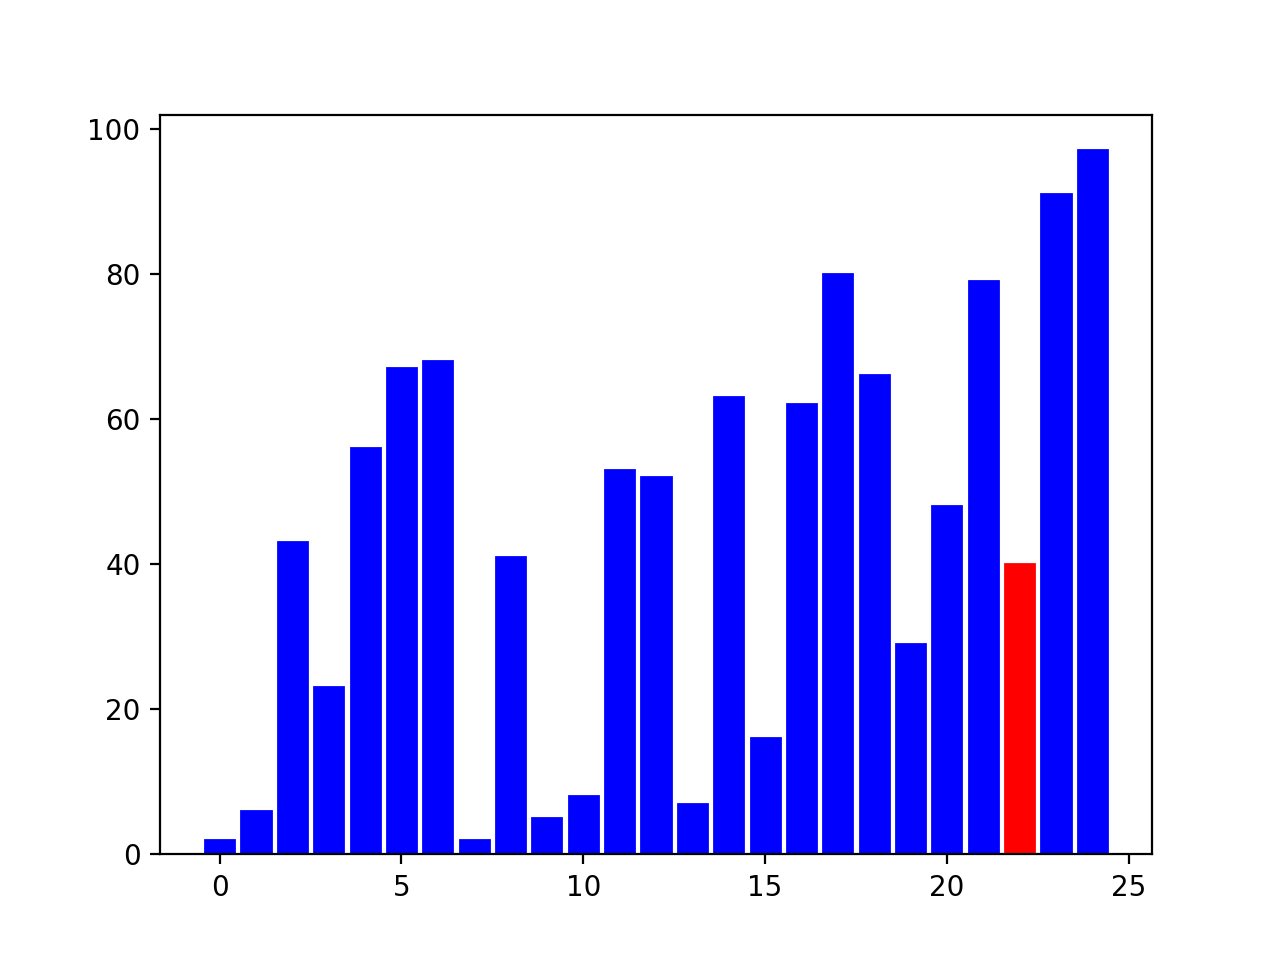

In [ ]:
# Bubble sort with color

l = list(np.random.randint(100, size=25))

fig, ax = plt.subplots()

x = list(range(len(l)))
barcol = ax.bar(x, l, color='b')


def gen_function() -> 'numpy.ndarray':
    '''индексы для проходов, на один меньше для каждого'''
    i_count = []                        #доп индексы для расскраски колонок
    j_count = []                        #доп индексы для расскраски колонок
    for j in range(1, int(len(l))):     #номер прохода
        for i in range(int(len(l)-j)):  #индексы прохода
            i_count.append(i)
            j_count.append(j)
    i_count, j_count = np.array(i_count), np.array(j_count)
    count_all = np.concatenate((i_count, j_count), axis=0)
    ind = count_all.reshape(len(i_count), 2, order='F')
    return ind


indexs = gen_function()


def update(indexs) -> 'строит график':
    '''бежит по индексам и переставляет, если след больше'''
    ind = indexs[0]
    ind_desc = indexs[1]

    barcol[ind].set_color('r')
    if l[ind] > l[ind + 1]:
        l.insert(ind + 1, l.pop(ind))
        barcol[ind].set_height(l[ind])
        barcol[ind + 1].set_height(l[ind + 1])
    barcol[ind - 1].set_color('b')  # закрашивает предыдущий синим

    if ind == 0:
        barcol[-ind_desc].set_color('b')    #закрашивает в синий дальнюю колонну

    return barcol


animation = FuncAnimation(
    fig,                  # figure where animation is displayed
    func=update,          # frame update function
    frames=indexs,        # each frame changing parameter
    fargs=(None),         # additional parameters for update function, pay attention to the comma
    interval=30,          # lattency
    blit=True,            # dubble buffering
    repeat=False)         # cycling


#animation.save(r"D:\WORK\animation.gif", dpi=250, writer=PillowWriter(fps=30))   # сохранение гифки
plt.show()
